In [21]:
# Import necessary libraries
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from pathlib import Path

In [22]:
# Read price data
file_path = Path("part 1 ETL Workflow/working.csv")
df_price = pd.read_csv(file_path)

# Display sample data
df_price.head()

,product,RetailPrice,energy_100g,fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,g_sum,other_carbs,...,boxcox_reconstructed_energy,transformed_reconstructed_energy,boxcox_g_sum,transformed_g_sum,cluster,category,certainty,alternative_cluster,alternative_category,anomaly
0,Artichoke,2.4703,314.0,6.67,3.33,1.67,1.67,0.76200,12.0,1.66,...,-0.263470,-1.033042,-0.290163,-1.195525,4,creams & dips,1.0000,6,strange cluster 6,0
1,Asparagus,2.9531,222.0,3.53,3.53,1.18,2.35,0.14986,10.0,2.35,...,-0.416842,-1.207215,-0.381893,-1.241809,4,creams & dips,0.6441,18,tomato sauce,0
2,Beets,1.1431,167.0,0.00,10.00,2.00,2.00,0.12700,12.0,8.00,...,-0.458748,-1.254806,-0.290163,-1.195525,18,tomato sauce,0.9965,1,beans & peas,0
3,Broccoli,2.3458,121.0,0.00,4.71,2.35,3.53,0.07366,8.0,2.36,...,-0.562940,-1.373130,-0.470604,-1.286569,18,tomato sauce,1.0000,8,yoghurt and milk,0
4,Carrots,1.1979,159.0,0.00,8.97,6.41,1.28,0.19558,10.0,2.56,...,-0.506612,-1.309162,-0.381893,-1.241809,18,tomato sauce,0.9999,8,yoghurt and milk,0


# chat gpt 

In [63]:
# Step 3: Drop rows with missing target values (if any)
df_cleaned = df_price.dropna(subset=['RetailPrice'])

# Step 4: Feature selection
# Dropping columns that are not relevant to the model (like product names and clustering information for now)
features = df_cleaned.drop(columns=['RetailPrice','product', 'category', 'alternative_category', 'cluster', 'alternative_cluster', 'anomaly'])

# Step 5: Prepare the target variable
target = df_cleaned['RetailPrice']

# Step 6: Splitting the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 7: Train a Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# # Initialize the model
# rf = RandomForestRegressor(n_estimators=100, random_state=42)

# # Train the model
# rf.fit(X_train, y_train)

# # Step 8: Make predictions on the test set
# y_pred = rf.predict(X_test)

# Step 9: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation results
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 19.951305986573455
R-squared: 0.1738560125593941


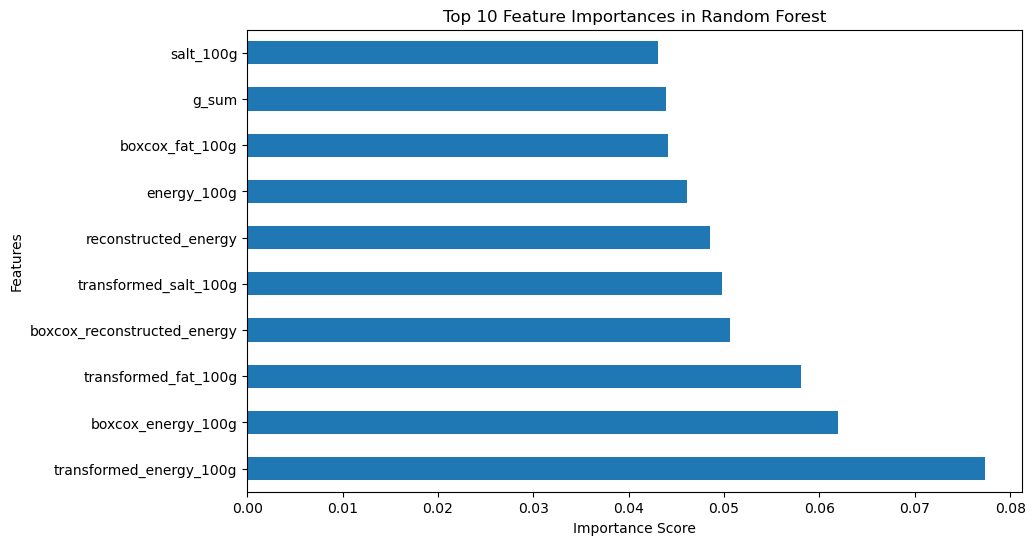

In [64]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importance from the RandomForestRegressor
feature_importances = pd.Series(rf.feature_importances_, index=features.columns)

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances in Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [65]:
from sklearn.model_selection import cross_val_score

# 5-fold cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')

# Output the cross-validation scores and mean score
print("Cross-validation R-squared scores:", cv_scores)
print("Mean cross-validation R-squared:", cv_scores.mean())

Cross-validation R-squared scores: [-0.15383598  0.14207555 -0.1411315  -0.11349457 -0.15052133]
Mean cross-validation R-squared: -0.0833815679194652


In [38]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Perform Randomized Search
random_search = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=10, cv=3, random_state=42, scoring='r2')
random_search.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters:", random_search.best_params_)
print("Best R-squared Score:", random_search.best_score_)

Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 30}
Best R-squared Score: 0.1348679376967312


In [39]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting model
gbr = GradientBoostingRegressor(n_estimators=300, max_depth=5, random_state=42)

# Fit the model
gbr.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_gbr = gbr.predict(X_test)

# Evaluate performance
from sklearn.metrics import mean_squared_error, r2_score

mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("Mean Squared Error (Gradient Boosting):", mse_gbr)
print("R-squared (Gradient Boosting):", r2_gbr)

Mean Squared Error (Gradient Boosting): 24.94795035697619
R-squared (Gradient Boosting): -0.03304511495401963


In [29]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline


# stop here until going over 20.2 random forest exercise

In [31]:
# 3. Predict using the unseen data
predictions = rf_model.predict(X_test_scaled)

NameError: name 'X_test_scaled' is not defined

In [30]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

print("Confusion Matrix")
display(cm_df)

NameError: name 'predictions' is not defined

In [27]:
# Model performance
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report


NameError: name 'predictions' is not defined

### begin ###

# overfitting cross validation

# feature scores

# Data Prep

In [68]:
df_price.columns

Index(['product', 'RetailPrice', 'energy_100g', 'fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g',
       'g_sum', 'other_carbs', 'reconstructed_energy',
       'boxcox_carbohydrates_100g', 'transformed_carbohydrates_100g',
       'boxcox_fat_100g', 'transformed_fat_100g', 'boxcox_proteins_100g',
       'transformed_proteins_100g', 'boxcox_sugars_100g',
       'transformed_sugars_100g', 'boxcox_other_carbs',
       'transformed_other_carbs', 'boxcox_salt_100g', 'transformed_salt_100g',
       'boxcox_energy_100g', 'transformed_energy_100g',
       'boxcox_reconstructed_energy', 'transformed_reconstructed_energy',
       'boxcox_g_sum', 'transformed_g_sum', 'cluster', 'category', 'certainty',
       'alternative_cluster', 'alternative_category', 'anomaly'],
      dtype='object')

In [76]:

# Select relevant features and the target variable
features = ['fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g']
target = 'cluster'

# Drop rows with missing values in the target variable
df_clean = df_price.dropna(subset=[target])

# Prepare the data for training
X = df_clean[features]
y = df_clean[target]


# Split the Data

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
y_train


42     14
12     18
15      6
114    12
76     19
       ..
106     2
14     18
92      7
51      0
102     4
Name: cluster, Length: 96, dtype: int64

# Training the Random Forest Model

In [79]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Evaluate

In [80]:

y_pred = rf.predict(X_test)
y_pred

array([12.36      , 12.71      , 18.57      ,  9.96      , 13.3       ,
       14.18      , 13.3       ,  8.65333333, 18.91      , 13.54      ,
        7.61      , 12.3       ,  8.06      , 18.86      ,  6.34      ,
       13.36      , 12.74      ,  5.44      , 13.03      ,  4.96      ,
       10.62      ,  9.84      ,  9.05      , 14.53      ])

In [81]:
from sklearn.metrics import mean_squared_error, r2_score

print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.39059274733311067
22.183058796296297


# Feature Importance

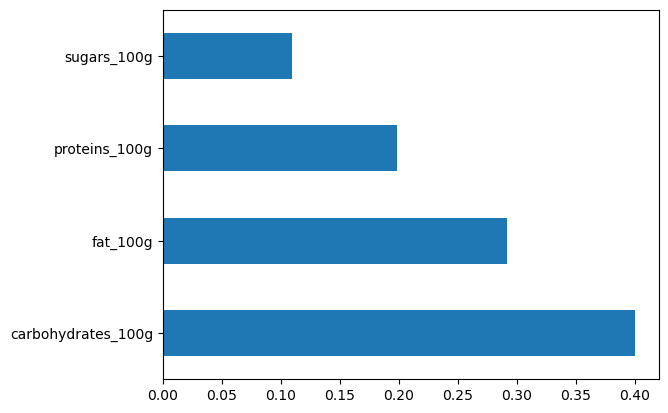

In [75]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 22.183058796296297
R-squared: 0.39059274733311067


In [83]:
from sklearn.linear_model import Ridge

# Apply Ridge regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()